In [1]:
import numpy as np
import pandas as pd
# df=pd.read_excel("allfeatures.xlsx")
df=pd.read_csv("../Independent_Project-main/allfeatures.csv")
print(f'shapte of feateures: {df.shape}')
print(f'total na values: {df.isna().sum().sum()}')
print(f'total null values: {df.isnull().sum().sum()}')

shapte of feateures: (7722, 1389)
total na values: 0
total null values: 0


In [ ]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score

def tune_hyperparameters(X, y):
    # Define the XGBoost classifier model
    model = xgb.XGBClassifier(
        objective='binary:logistic',
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42,
        n_jobs=-1  # Utilize all available CPUs for xgboost
    )

    # Define the parameter grid to search
    params = {
        'max_depth': [3, 5, 7, 9],
        'learning_rate': [0.01, 0.05, 0.1, 0.2],
        'n_estimators': [100, 200, 300, 400],
        'colsample_bytree': [0.5, 0.7, 0.9, 1],
        'subsample': [0.5, 0.7, 0.9, 1],
        'gamma': [0, 0.1, 0.2, 0.3]
    }

    # Setup GridSearchCV to find the best hyperparameters
    # n_jobs=-1 uses all available CPUs for the grid search
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=params,
        scoring='roc_auc',
        cv=5,
        verbose=1,
        n_jobs=-1  # Utilize all available CPUs for GridSearchCV
    )

    # Fit GridSearchCV on the provided training data
    grid_search.fit(X, y)

    # Output the best parameters and the best AUC score achieved
    print("Best parameters:", grid_search.best_params_)
    print("Best AUC: {:.4f}".format(grid_search.best_score_))

    # Return the model with the best parameters
    return grid_search.best_estimator_

# Feature matrix and label vector as specified
X = df.drop(['pcid', 'class', 'smile'], axis=1)
y = df['class']

# Call the function with your dataset
best_model = tune_hyperparameters(X, y)

In [2]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame with the necessary columns
X = df.drop(['class', 'pcid', 'smile'], axis=1)  # feature matrix
y = df['class']  # label vector (binary)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance of XGBoost not necessary but can be performed if part of your preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Train the model
model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for positive class

# Calculating the evaluation metrics
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the metrics
print(f"ROC AUC Score: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

ROC AUC Score: 0.94
F1 Score: 0.86
Precision: 0.86
Recall: 0.86
Accuracy: 0.87


In [4]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df' is your DataFrame and it's already loaded
X = df.drop(['class', 'smile', 'pcid'], axis=1)  # feature matrix
y = df['class']  # label vector (binary)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for XGBoost which is not necessary but included for completeness
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the model
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Create the parameter grid
param_grid = {
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300]
}

# Setup the grid search
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy', verbose=1)

# Fit the grid search to the data
grid_search.fit(X_train_scaled, y_train)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Predicting the test set results
y_pred = best_model.predict(X_test_scaled)
y_proba = best_model.predict_proba(X_test_scaled)[:, 1]

# Calculating the evaluation metrics
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the metrics
print(f"ROC AUC Score: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

Fitting 3 folds for each of 81 candidates, totalling 243 fits
Best parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_child_weight': 1, 'n_estimators': 200}
Best cross-validation score: 0.87
ROC AUC Score: 0.95
F1 Score: 0.87
Precision: 0.87
Recall: 0.87
Accuracy: 0.88


In [5]:
import numpy as np
import pandas as pd
from datetime import datetime
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier

def timer(start_time=None):
    if not start_time:
        start_time = datetime.now()
        return start_time
    elif start_time:
        thour, temp_sec = divmod((datetime.now() - start_time).total_seconds(), 3600)
        tmin, tsec = divmod(temp_sec, 60)
        print('\n Time taken: %i hours %i minutes and %s seconds.' % (thour, tmin, round(tsec, 2)))


params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [4, 5, 6, 7, 8]
        }

xgb = XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=2)

folds = 10
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 1001)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=10, cv=skf.split(X_train_scaled, y_train), verbose=3, random_state=1001 )

# Here we go
start_time = timer(None) # timing starts from this point for "start_time" variable
random_search.fit(X_train_scaled, y_train)
timer(start_time) # timing ends here for "start_time" variable

Fitting 10 folds for each of 5 candidates, totalling 50 fits

 Time taken: 0 hours 2 minutes and 16.69 seconds.


In [6]:
#print('\n All results:')
#print(random_search.cv_results_)
print('\n Best estimator:')
print(random_search.best_estimator_)
print('\n Best normalized gini score for %d-fold search with %d parameter combinations:' % (folds, param_comb))
print(random_search.best_score_ * 2 - 1)
print('\n Best hyperparameters:')
print(random_search.best_params_)


 Best estimator:
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.02, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=5, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=600, n_jobs=None, nthread=2,
              num_parallel_tree=None, ...)

 Best normalized gini score for 10-fold search with 5 parameter combinations:
0.8929648651599802

 Best hyperparameters:
{'subsample': 0.8, 'min_child_weight': 5, 'max_depth': 7, 'gamma': 1, 'colsample_bytree': 1.0}


In [7]:
y_pred = random_search.predict(X_test_scaled)
y_proba = random_search.predict_proba(X_test_scaled)[:, 1]
 
# Calculating the evaluation metrics
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
 
# Printing the metrics 
print(f"ROC AUC Score: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")

ROC AUC Score: 0.95
F1 Score: 0.88
Precision: 0.88
Recall: 0.87
Accuracy: 0.88


In [9]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

shapData = pd.read_csv("../Independent_Project-main/allfeatures.csv")
shapData.head()

,nAcid,apol,naAromAtom,nAromBond,nAtom,nHeavyAtom,nH,nB,nC,nN,...,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pcid,smile,class
0,0,14.560758,6,6,12,6,6,0,6,0,...,0,0,0,0,0,0,0,241,C1=CC=CC=C1,1
1,0,6.366793,0,0,2,1,1,0,0,0,...,0,0,0,0,0,0,0,26623,[Hg++],1
2,0,7.700379,0,0,6,3,3,0,2,0,...,0,0,0,0,0,0,0,6338,ClC=C,1
3,0,43.201516,20,24,32,20,12,0,20,0,...,0,0,0,0,0,0,0,2336,C1=CC=C2C(=C1)C=C1C=CC3=C4C(C=CC2=C14)=CC=C3,1
4,0,43.201516,20,22,32,20,12,0,20,0,...,0,0,0,0,0,0,0,9153,C1=CC=C2C(=C1)C1=CC3=CC=CC=C3C3=CC=CC2=C13,1


In [10]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score, accuracy_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

# Assuming 'df' is your DataFrame with the necessary columns
X = shapData.drop(['class', 'pcid', 'smile'], axis=1)  # feature matrix
y = shapData['class']  # label vector (binary)

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling for better performance of XGBoost not necessary but can be performed if part of your preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the XGBoost classifier
model = xgb.XGBClassifier(learning_rate=0.02, n_estimators=600, objective='binary:logistic', nthread=4, subsample=0.8, min_child_weight=5, max_depth=7, gamma=1, colsample_bytree=1.0)

# Train the model
model.fit(X_train_scaled, y_train)

# Predicting the test set results
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]  # probabilities for positive class

# Calculating the evaluation metrics
auc = roc_auc_score(y_test, y_proba)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Printing the metrics
print(f"ROC AUC Score: {auc:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Accuracy: {accuracy:.2f}")
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error: ", mse)
print("R-Squared: ", r2)

print(classification_report(y_pred, y_test))

ROC AUC Score: 0.95
F1 Score: 0.88
Precision: 0.88
Recall: 0.87
Accuracy: 0.88
Mean Squared Error:  0.11715210355987055
R-Squared:  0.5304550629149414
              precision    recall  f1-score   support

           0       0.89      0.88      0.89       816
           1       0.87      0.88      0.88       729

    accuracy                           0.88      1545
   macro avg       0.88      0.88      0.88      1545
weighted avg       0.88      0.88      0.88      1545



In [11]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

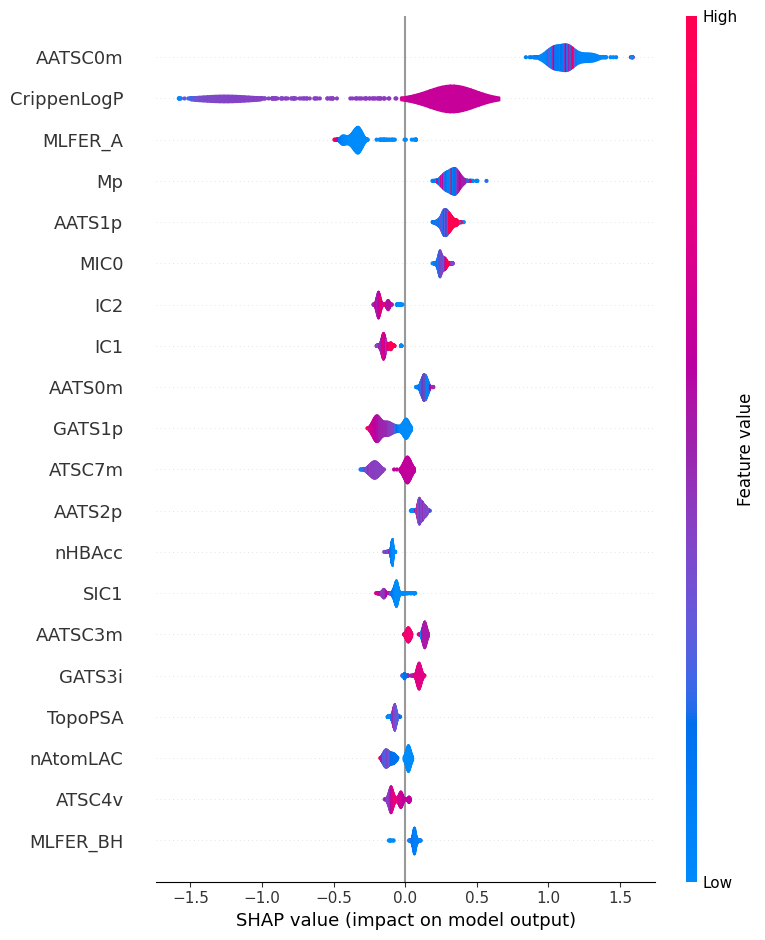

In [12]:
shap.summary_plot(shap_values, X_test, plot_type='violin')

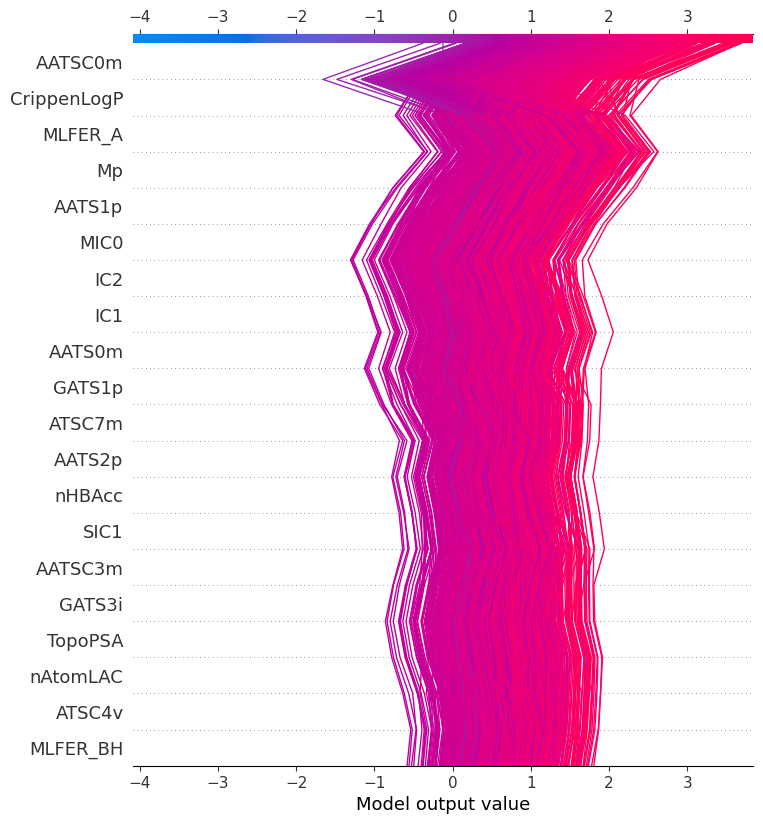

In [13]:
shap.decision_plot(explainer.expected_value, shap_values, X_test.columns)

In [14]:
shap.force_plot(explainer.expected_value, shap_values[0], X_test.iloc[0,:])

In [15]:
shap_values_explanation = shap.Explanation(shap_values, base_values=0, feature_names=X.columns, data=X_test.to_numpy())

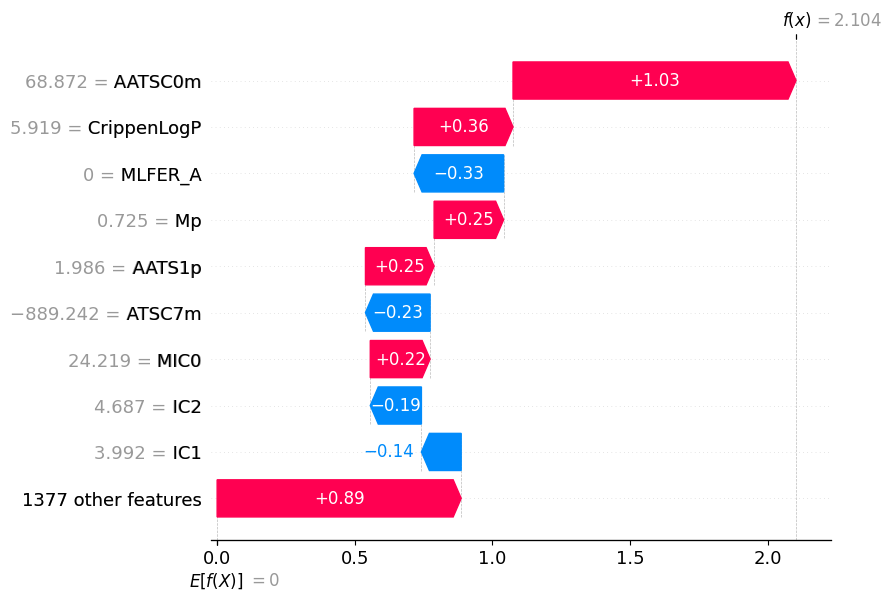

In [16]:
shap.plots.waterfall(shap_values_explanation[0])

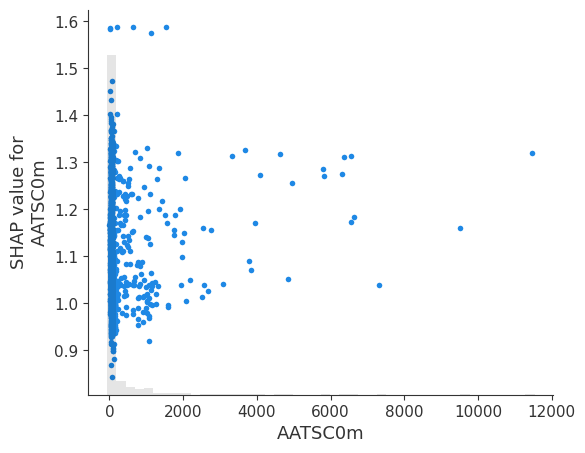

In [17]:
shap.plots.scatter(shap_values_explanation[:,'AATSC0m'])

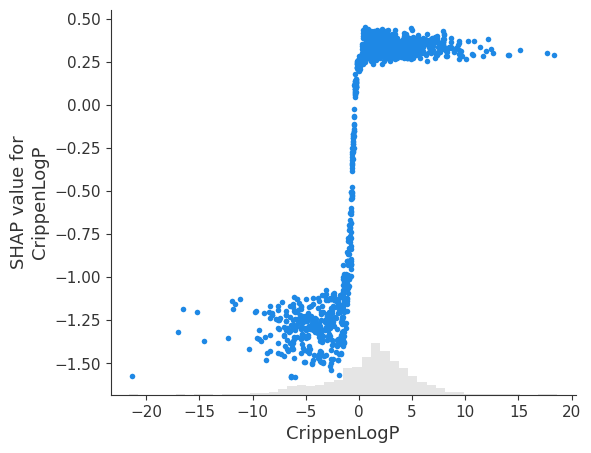

In [18]:
shap.plots.scatter(shap_values_explanation[:,'CrippenLogP'])

In [19]:
from scipy.special import softmax

def feature_importances_shap_values(shap_values, features):
    # Calculates the feature importance (mean absolute shap value) for each feature
    importances = []
    for i in range(shap_values.values.shape[1]):
        importances.append(np.mean(np.abs(shap_values.values[:, i])))
    # Calculates the normalized version
    importances_norm = softmax(importances)
    # Organize the importances and columns in a dictionary
    feature_importances = {fea: imp for imp, fea in zip(importances, features)}
    feature_importances_norm = {fea: imp for imp, fea in zip(importances_norm, features)}
    # Sorts the dictionary
    feature_importances = {k: v for k, v in sorted(feature_importances.items(), key=lambda item: item[1], reverse = True)}
    feature_importances_norm= {k: v for k, v in sorted(feature_importances_norm.items(), key=lambda item: item[1], reverse = True)}
    # Prints the feature importances
    features_shap_values = []
    for k, v in feature_importances.items():
        features_shap_values.append(f"{k} -> {v:.4f} (softmax = {feature_importances_norm[k]:.4f})")
    return features_shap_values

features_shap_values = feature_importances_shap_values(shap_values_explanation, X_test)
print('top 10 features')
print('\n'.join(features_shap_values[:10]))

top 10 features
AATSC0m -> 1.1216 (softmax = 0.0022)
CrippenLogP -> 0.5525 (softmax = 0.0012)
MLFER_A -> 0.3534 (softmax = 0.0010)
Mp -> 0.3230 (softmax = 0.0010)
AATS1p -> 0.2857 (softmax = 0.0010)
MIC0 -> 0.2522 (softmax = 0.0009)
IC2 -> 0.1685 (softmax = 0.0008)
IC1 -> 0.1440 (softmax = 0.0008)
AATS0m -> 0.1313 (softmax = 0.0008)
GATS1p -> 0.1234 (softmax = 0.0008)


In [21]:
with open("feature_importances_shap_values.txt", 'w') as file:
    file.write('\n'.join(features_shap_values))